# Viewing and understanding the massive cloud phase biases in the midlatitudes.

In [1]:
import sys
# Add common resources folder to path
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/Common/")
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    ccrs, metrics, Iterable
    )

from functions import (
    masked_average, add_weights, sp_map,
    season_mean, get_dpm, leap_year, share_ylims
    )

from classes import SatComp_Metric, CT_SLF_Metric

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Check running location and adjust working directory appropriately.

In [2]:
host = os.uname()[1]
if 'jupyter' in host.split('-'): # Check if running on NIRD through the Jupyter Hub
    print('Running through MC2 Jupyter Hub')
    model_dir = '/mnt/mcc-ns9600k/jonahks/'
    os.chdir(model_dir)

else:  # Assume that we're running on a local machine and mounting NIRD
    print('Running on %s, attempting to mount ns9600k/jonahks/ from NIRD' % str(host))
    os.system('fusermount -zu ~/drivemount/')  # unmount first
    os.system('sshfs jonahks@login.nird.sigma2.no:"p/jonahks/" ~/drivemount/')    # Calling mountnird from .bashrc doesn't work
    os.chdir('/home/jonahks/drivemount/')
    save_dir = '~/DATAOUT/'
    save_to = os.path.expanduser(save_dir)

output_dir = 'figures/'
case_dir = 'satcomp/'   # inconsistent label compared to jupy_test
conv_dir ='convectivephase/'

# Check that each important directory can be accessed:    
access_paths = os.path.exists(output_dir) and os.path.exists(case_dir) and os.path.exists(conv_dir)
print('Can access all directory paths:', access_paths)

Running through MC2 Jupyter Hub
Can access all directory paths: True


In [22]:
os.listdir('/caliop_olimpia/ct_slf_olimpia/')

FileNotFoundError: [Errno 2] No such file or directory: '/caliop_olimpia/ct_slf_olimpia/'

In [29]:
SLF_ct = xr.open_dataset('%s%s' % ('caliop_olimpia/ct_slf_olimpia/', 'cloudtop_slfs.nc'))
SLF_bulk = xr.open_dataset('%s%s' % ('caliop_olimpia/incloud_slf_olimpia/', 'incloud_slfs.nc'))

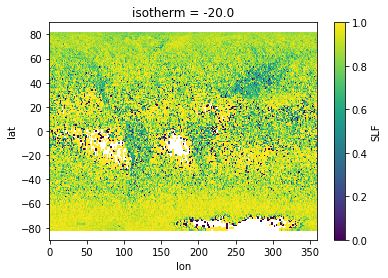

In [28]:
SLF_ct['SLF'][:,:,4].plot()

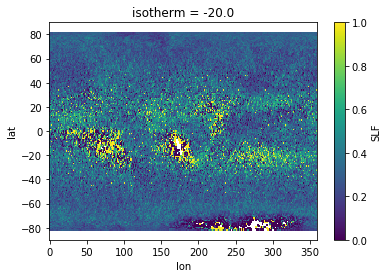

In [30]:
SLF_bulk['SLF'][:,:,4].plot()

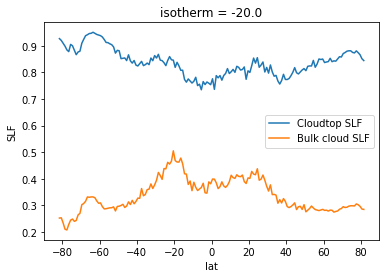

In [32]:
SLF_ct['SLF'][:,:,4].mean('lon').plot(label="Cloudtop SLF")
SLF_bulk['SLF'][:,:,4].mean('lon').plot(label="Bulk cloud SLF")
plt.legend()

In [4]:
convect_detr = SatComp_Metric(conv_dir)

Loading GOCCP data...done.
Loading CALIOP SLFs...done


In [5]:
convect_detr.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', path=case_dir, label="NorESM2")
convect_detr.add_case("20200520_194321_fitting_runs_convdetramp15b_wbf_1_inp_1", label="Detrainment Change")

Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1
20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1 load successfully.
Trying to load concatenated file for 20200520_194321_fitting_runs_convdetramp15b_wbf_1_inp_1
20200520_194321_fitting_runs_convdetramp15b_wbf_1_inp_1 load successfully.


/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.p

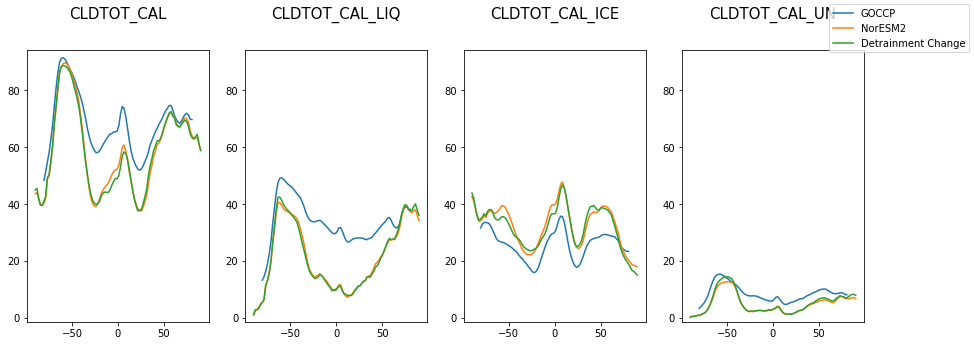

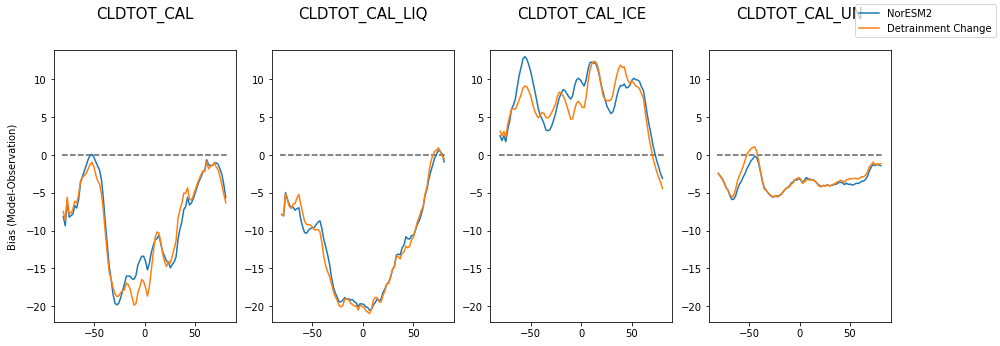

In [6]:
conv_cldtot = convect_detr.plot1D('CLDTOT_CAL', layers=True)
conv_cldtot_bias = convect_detr.plot1D('CLDTOT_CAL', layers=True, bias=True)

In [4]:
normal_clubb = xr.open_dataset('%s%s' % (conv_dir, 'testnoramp_zsmvars.nc'))
short_ramp = xr.open_dataset('%s%s' % (conv_dir, 'testramp_zsmvars.nc'))

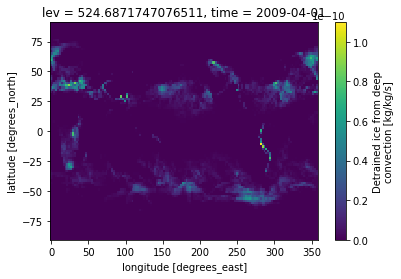

In [5]:
normal_clubb['DPDLFICE'].sel(lev=500,method="nearest").plot(label="Standard Ramp")


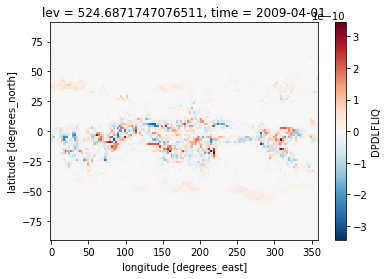

In [6]:
(short_ramp['DPDLFLIQ']-normal_clubb['DPDLFLIQ']).sel(lev=500,method="nearest").plot(label="Standard Ramp")


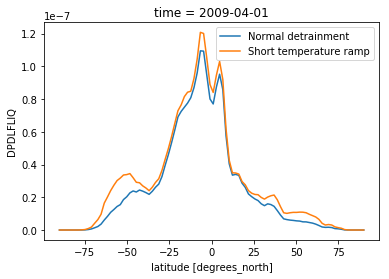

In [19]:
normal_clubb['DPDLFLIQ'].sum(["lev","lon"]).plot(label="Normal detrainment")
short_ramp['DPDLFLIQ'].sum(["lev","lon"]).plot(label="Short temperature ramp")
plt.legend()

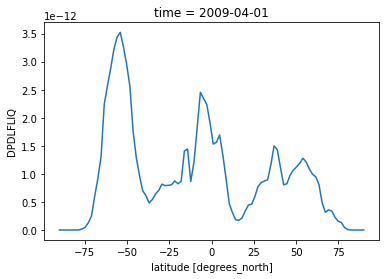

In [13]:
(short_ramp['DPDLFLIQ'] - normal_clubb['DPDLFLIQ']).mean(["lev","lon"]).plot(label="Short temperature ramp")

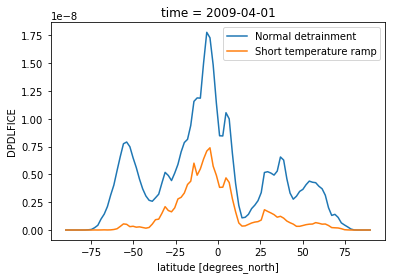

In [20]:
normal_clubb['DPDLFICE'].sum(["lev","lon"]).plot(label="Normal detrainment")
short_ramp['DPDLFICE'].sum(["lev","lon"]).plot(label="Short temperature ramp")
plt.legend()

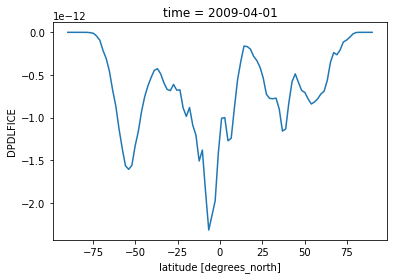

In [16]:
(short_ramp['DPDLFICE'] - normal_clubb['DPDLFICE']).mean(["lev","lon"]).plot(label="Short temperature ramp")

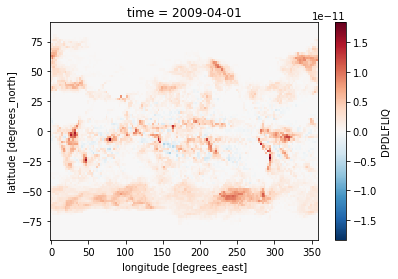

In [8]:
(short_ramp['DPDLFLIQ']-normal_clubb['DPDLFLIQ']).mean("lev").plot(label="Change in detrained liquid")


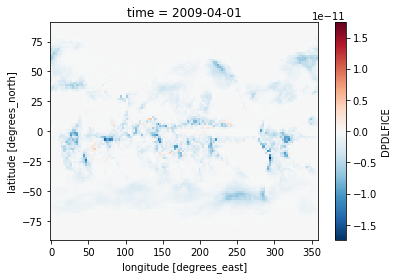

In [9]:
(short_ramp['DPDLFICE']-normal_clubb['DPDLFICE']).mean("lev").plot(label="Change in detrained liquid")


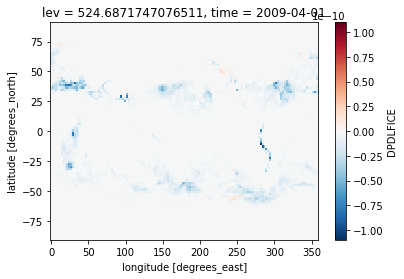

In [8]:
(short_ramp['DPDLFICE']-normal_clubb['DPDLFICE']).sel(lev=500,method="nearest").plot(label="Standard Ramp")


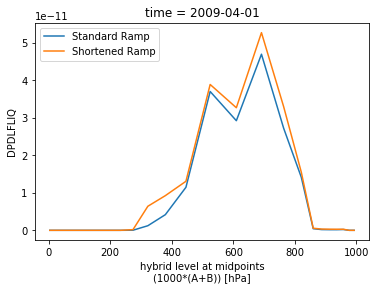

In [12]:
plt.figure()
normal_clubb['DPDLFLIQ'].mean(['lat','lon']).plot(label="Standard Ramp")
short_ramp['DPDLFLIQ'].mean(['lat','lon']).plot(label="Shortened Ramp")
plt.legend()

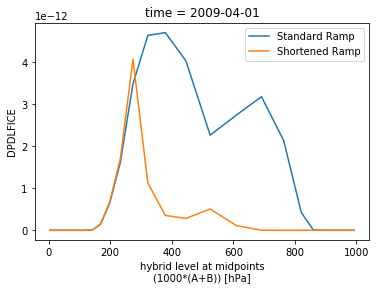

In [13]:
plt.figure()
normal_clubb['DPDLFICE'].mean(['lat','lon']).plot(label="Standard Ramp")
short_ramp['DPDLFICE'].mean(['lat','lon']).plot(label="Shortened Ramp")
plt.legend()

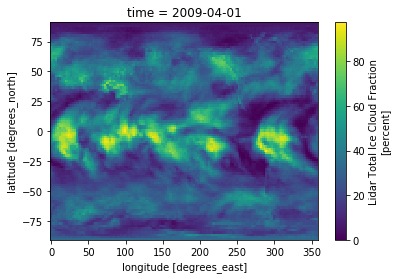

In [17]:
normal_clubb['CLDTOT_CAL_ICE'].plot(label="Standard Ramp")

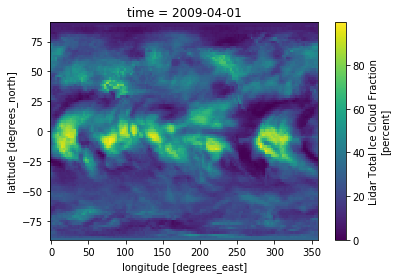

In [16]:
short_ramp['CLDTOT_CAL_ICE'].plot(label="Shortened Ramp")

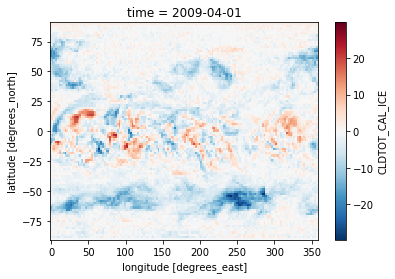

In [19]:
(short_ramp['CLDTOT_CAL_ICE']-normal_clubb['CLDTOT_CAL_ICE']).plot()

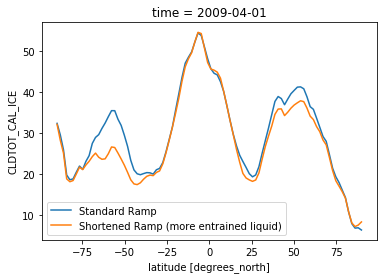

In [26]:
plt.figure()
normal_clubb['CLDTOT_CAL_ICE'].mean('lon').plot(label="Standard Ramp")
short_ramp['CLDTOT_CAL_ICE'].mean('lon').plot(label="Shortened Ramp (more entrained liquid)")
plt.legend()

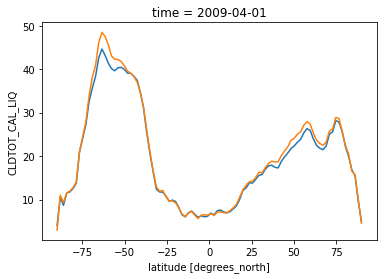

In [23]:
normal_clubb['CLDTOT_CAL_LIQ'].mean('lon').plot()
short_ramp['CLDTOT_CAL_LIQ'].mean('lon').plot()

In [7]:
just_controls = SatComp_Metric(case_dir)
just_controls.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="NorESM2")
# just_controls.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1', label="NorESM2freeice")
just_controls.add_case('CESM2_slfvars', label="CESM2")

Loading GOCCP data...done.
Loading CALIOP SLFs...done
Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1
20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1 load successfully.
Trying to load concatenated file for CESM2_slfvars
CESM2_slfvars load successfully.


/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.p

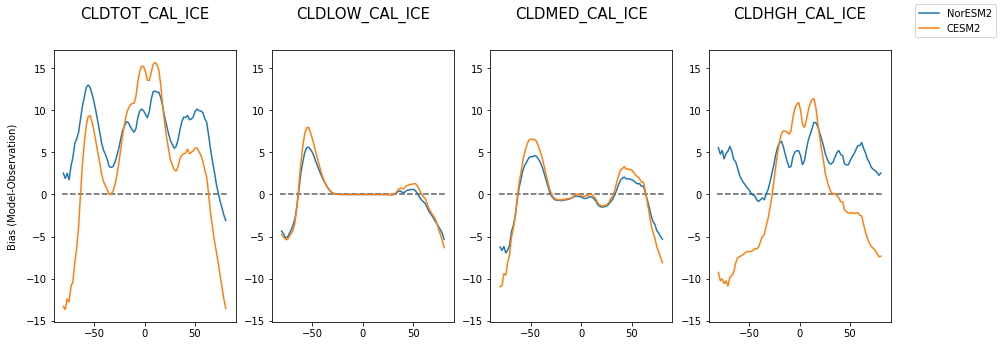

In [8]:
ice_bias = just_controls.plot1D('CAL_ICE',layers=True, bias=True)

/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.p

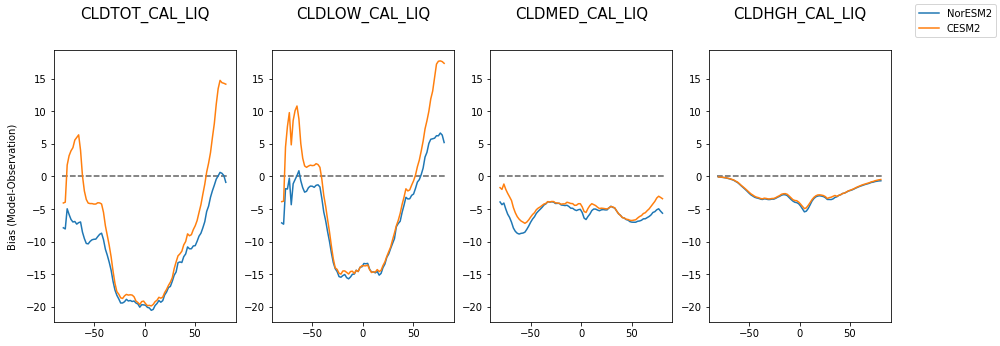

In [9]:
liq_bias = just_controls.plot1D('CAL_LIQ',layers=True, bias=True)

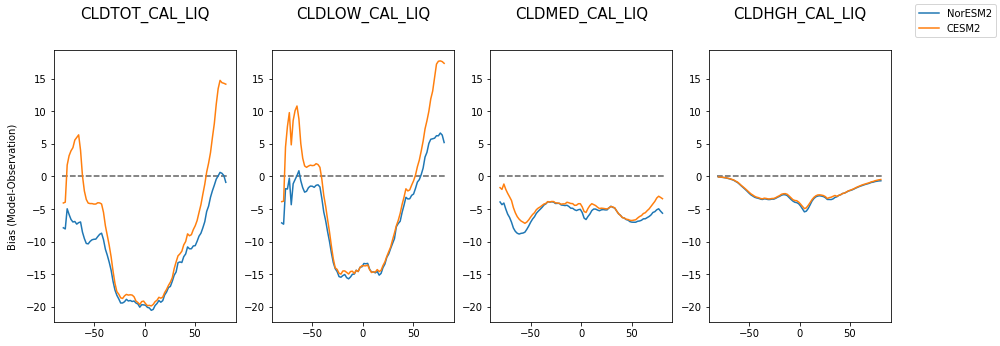

In [11]:
liq_bias

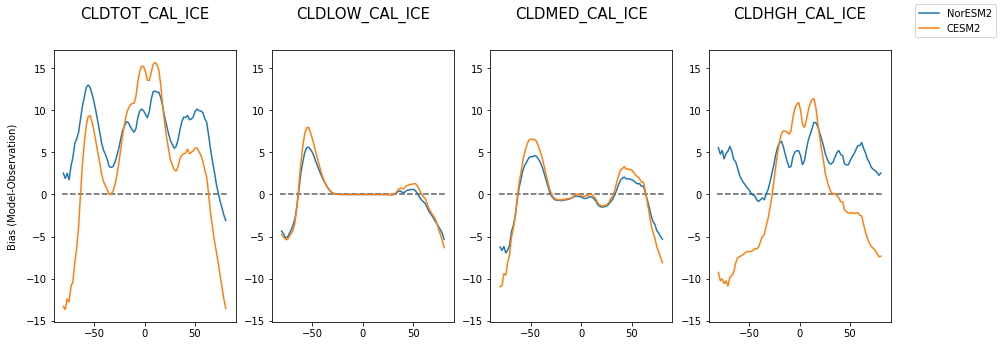

In [10]:
ice_bias